# Initial Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Set maximum number of columns to be displayed with pandas
pd.set_option('display.max_columns', 50)

# Function Definitions

## Missing values on DataFrame

In [3]:
def missingValues(df):
    '''
    Missing values on each column
    '''
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

## Categorical variables evaluation

In [4]:
def categorical_eval(df, feature, add_text):
    '''
    Auxiliar function for visualization of categorical variables
    '''
    freqs = df[feature].value_counts()
    print(freqs)
    plt.figure(figsize=(10,6))
    sns.barplot(x=freqs.index, y=freqs.values)
    plt.title(feature + add_text)
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

## Distribution graphs

In [5]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    '''
    Distribution graphs (histogram/bar graph) of column data
    '''
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 60]] # For displaying purposes, pick columns that have between 1 and 60 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar(color=list('rgbkymc'))
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

## Correlation matrix

In [6]:
def plotCorrelationMatrix(df, graphWidth):
    '''
    Correlation matrix
    '''
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

## Scatter and densitiy plots

In [7]:
def plotScatterMatrix(df, plotSize, textSize):
    '''
    Scatter and density plots
    '''
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Check first file: vgsales-12-4-2019-short.csv

In [8]:
df1 = pd.read_csv('data/vgsales-12-4-2019-short.csv', delimiter=',')
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 55792 rows and 16 columns


In [9]:
df1.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [10]:
# Missing values on each column
missingValues(df1)

,column_name,percent_missing
Rank,Rank,0.000000
Name,Name,0.000000
Genre,Genre,0.000000
ESRB_Rating,ESRB_Rating,57.658804
Platform,Platform,0.000000
Publisher,Publisher,0.000000
Developer,Developer,0.030470
Critic_Score,Critic_Score,88.285059
User_Score,User_Score,99.399555
Total_Shipped,Total_Shipped,96.725337


According to this values, we can the following columns, as they will not give enough information to the dataset because they're almost empty (> 75% values are missing): Critic_Score, User_Score, Total_Shipped, NA_Sales, PAL_sales, JP_sales.

However, this would give us a very reduced DataFrame, where we don't have much information on sales per region (only 'Global_Sales' and 'Other_Sales', with a high % of missing values). We should try with the other dataset and see if we can have more information on this features there

# Check second file: vgsales-12-4-2019.csv

In [11]:
# vgsales-12-4-2019-start.csv has 55792 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('data/vgsales-12-4-2019.csv', delimiter=',')
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 55792 rows and 23 columns


In [12]:
df2.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [13]:
# Missing values on each column
missingValues(df2)

,column_name,percent_missing
Rank,Rank,0.000000
Name,Name,0.000000
basename,basename,0.000000
Genre,Genre,0.000000
ESRB_Rating,ESRB_Rating,57.658804
Platform,Platform,0.000000
Publisher,Publisher,0.000000
Developer,Developer,0.030470
VGChartz_Score,VGChartz_Score,100.000000
Critic_Score,Critic_Score,88.285059


Number of empty values seem to be the same in both datasets. To check this, we will take only the columns in df2 that are present in df1 and check the different rows in both dataframes:

## Check differences between df1 & df2

In [14]:
# Save df2 only with the columns that belongs to df1
cols2 = list(df1.columns)
df2 = df2[cols2]

# Check the different rows between df1 & df2, and drop the duplicates
dfcompare = pd.concat([df1,df2]).drop_duplicates(keep=False)
nRows, nCols = dfcompare.shape
print('The number of different rows between both datasets is {}'.format(nRows))

The number of different rows between both datasets is 0


Thus, the second dataframe is just an expansion of the first one with some added columns (probably, is the output of a merge left with a larger dataset).

Therefore, from here on, we will only keep working with the second dataset, as it contains the same info as the first one, but with some extra columns

# Get dataset general distribution information

As mentioned before, from now on we will only work with df2, as it contains the same information as df1, but expanded with some extra columns.

Therefore, we will call it just as 'df' to keep code as clean as possible

In [15]:
# Load data from df2 as df
df = pd.read_csv('data/vgsales-12-4-2019.csv', delimiter=',')
nRow, nCol = df.shape
df.dataframeName = 'vgsales-12-4-2019.csv'
print(f'There are {nRow} rows and {nCol} columns')

# Rename PAL_Sales to EU_Sales to improve dataset understanding
df.rename(columns={'PAL_Sales': 'EU_Sales'}, inplace=True)

There are 55792 rows and 23 columns


In [16]:
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


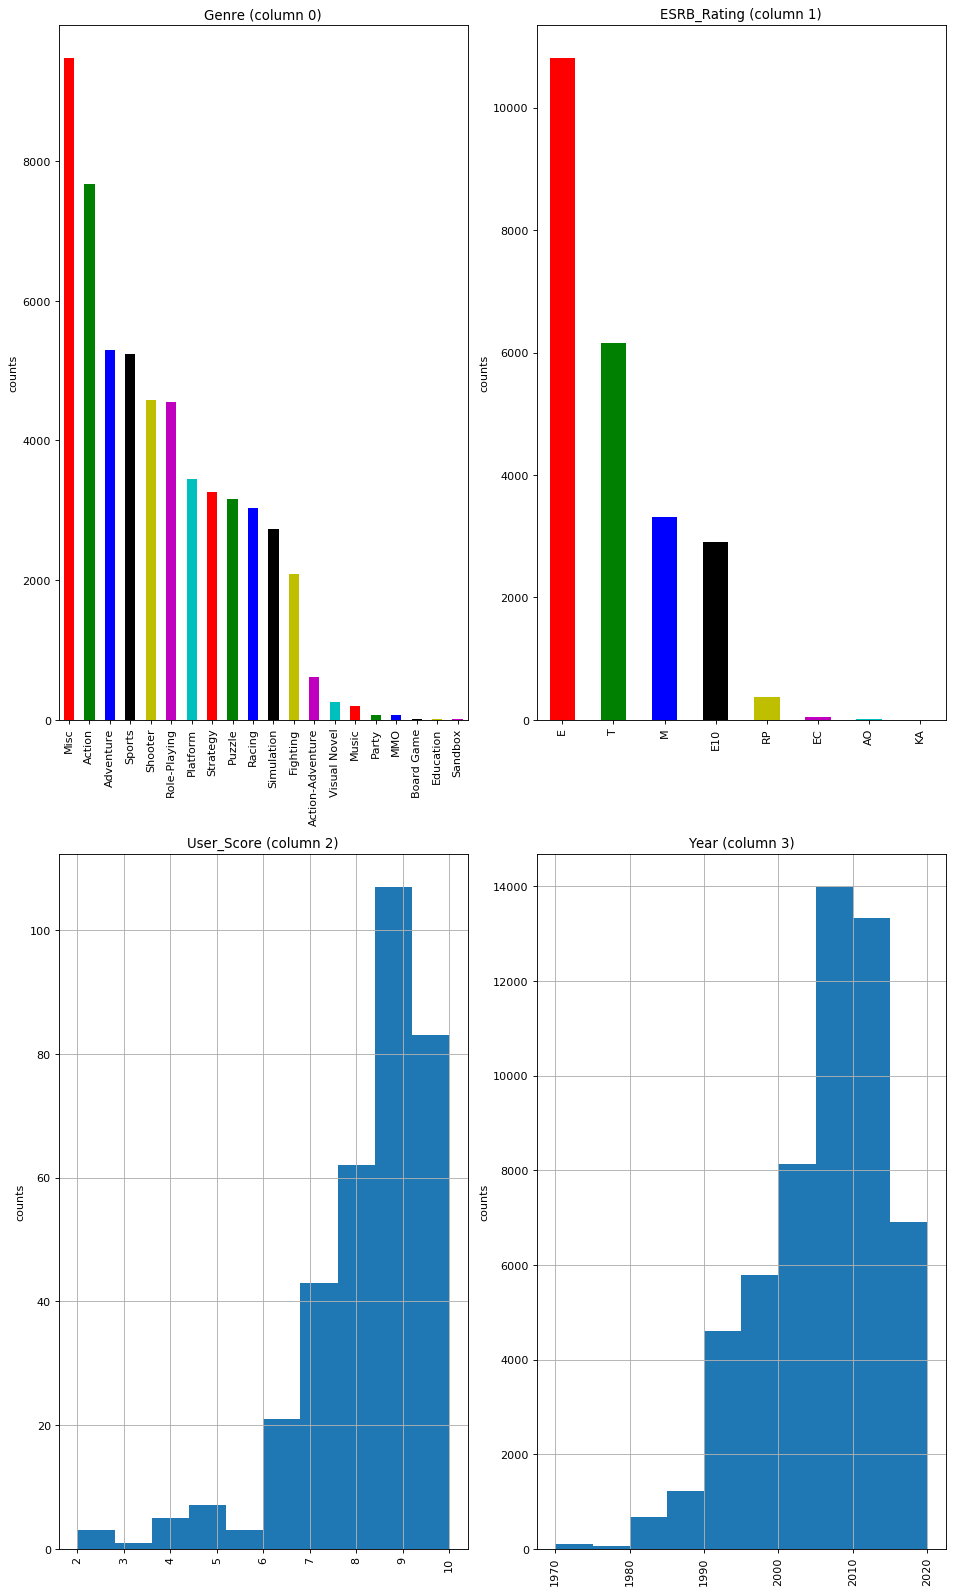

In [17]:
plotPerColumnDistribution(df, 10, 2)

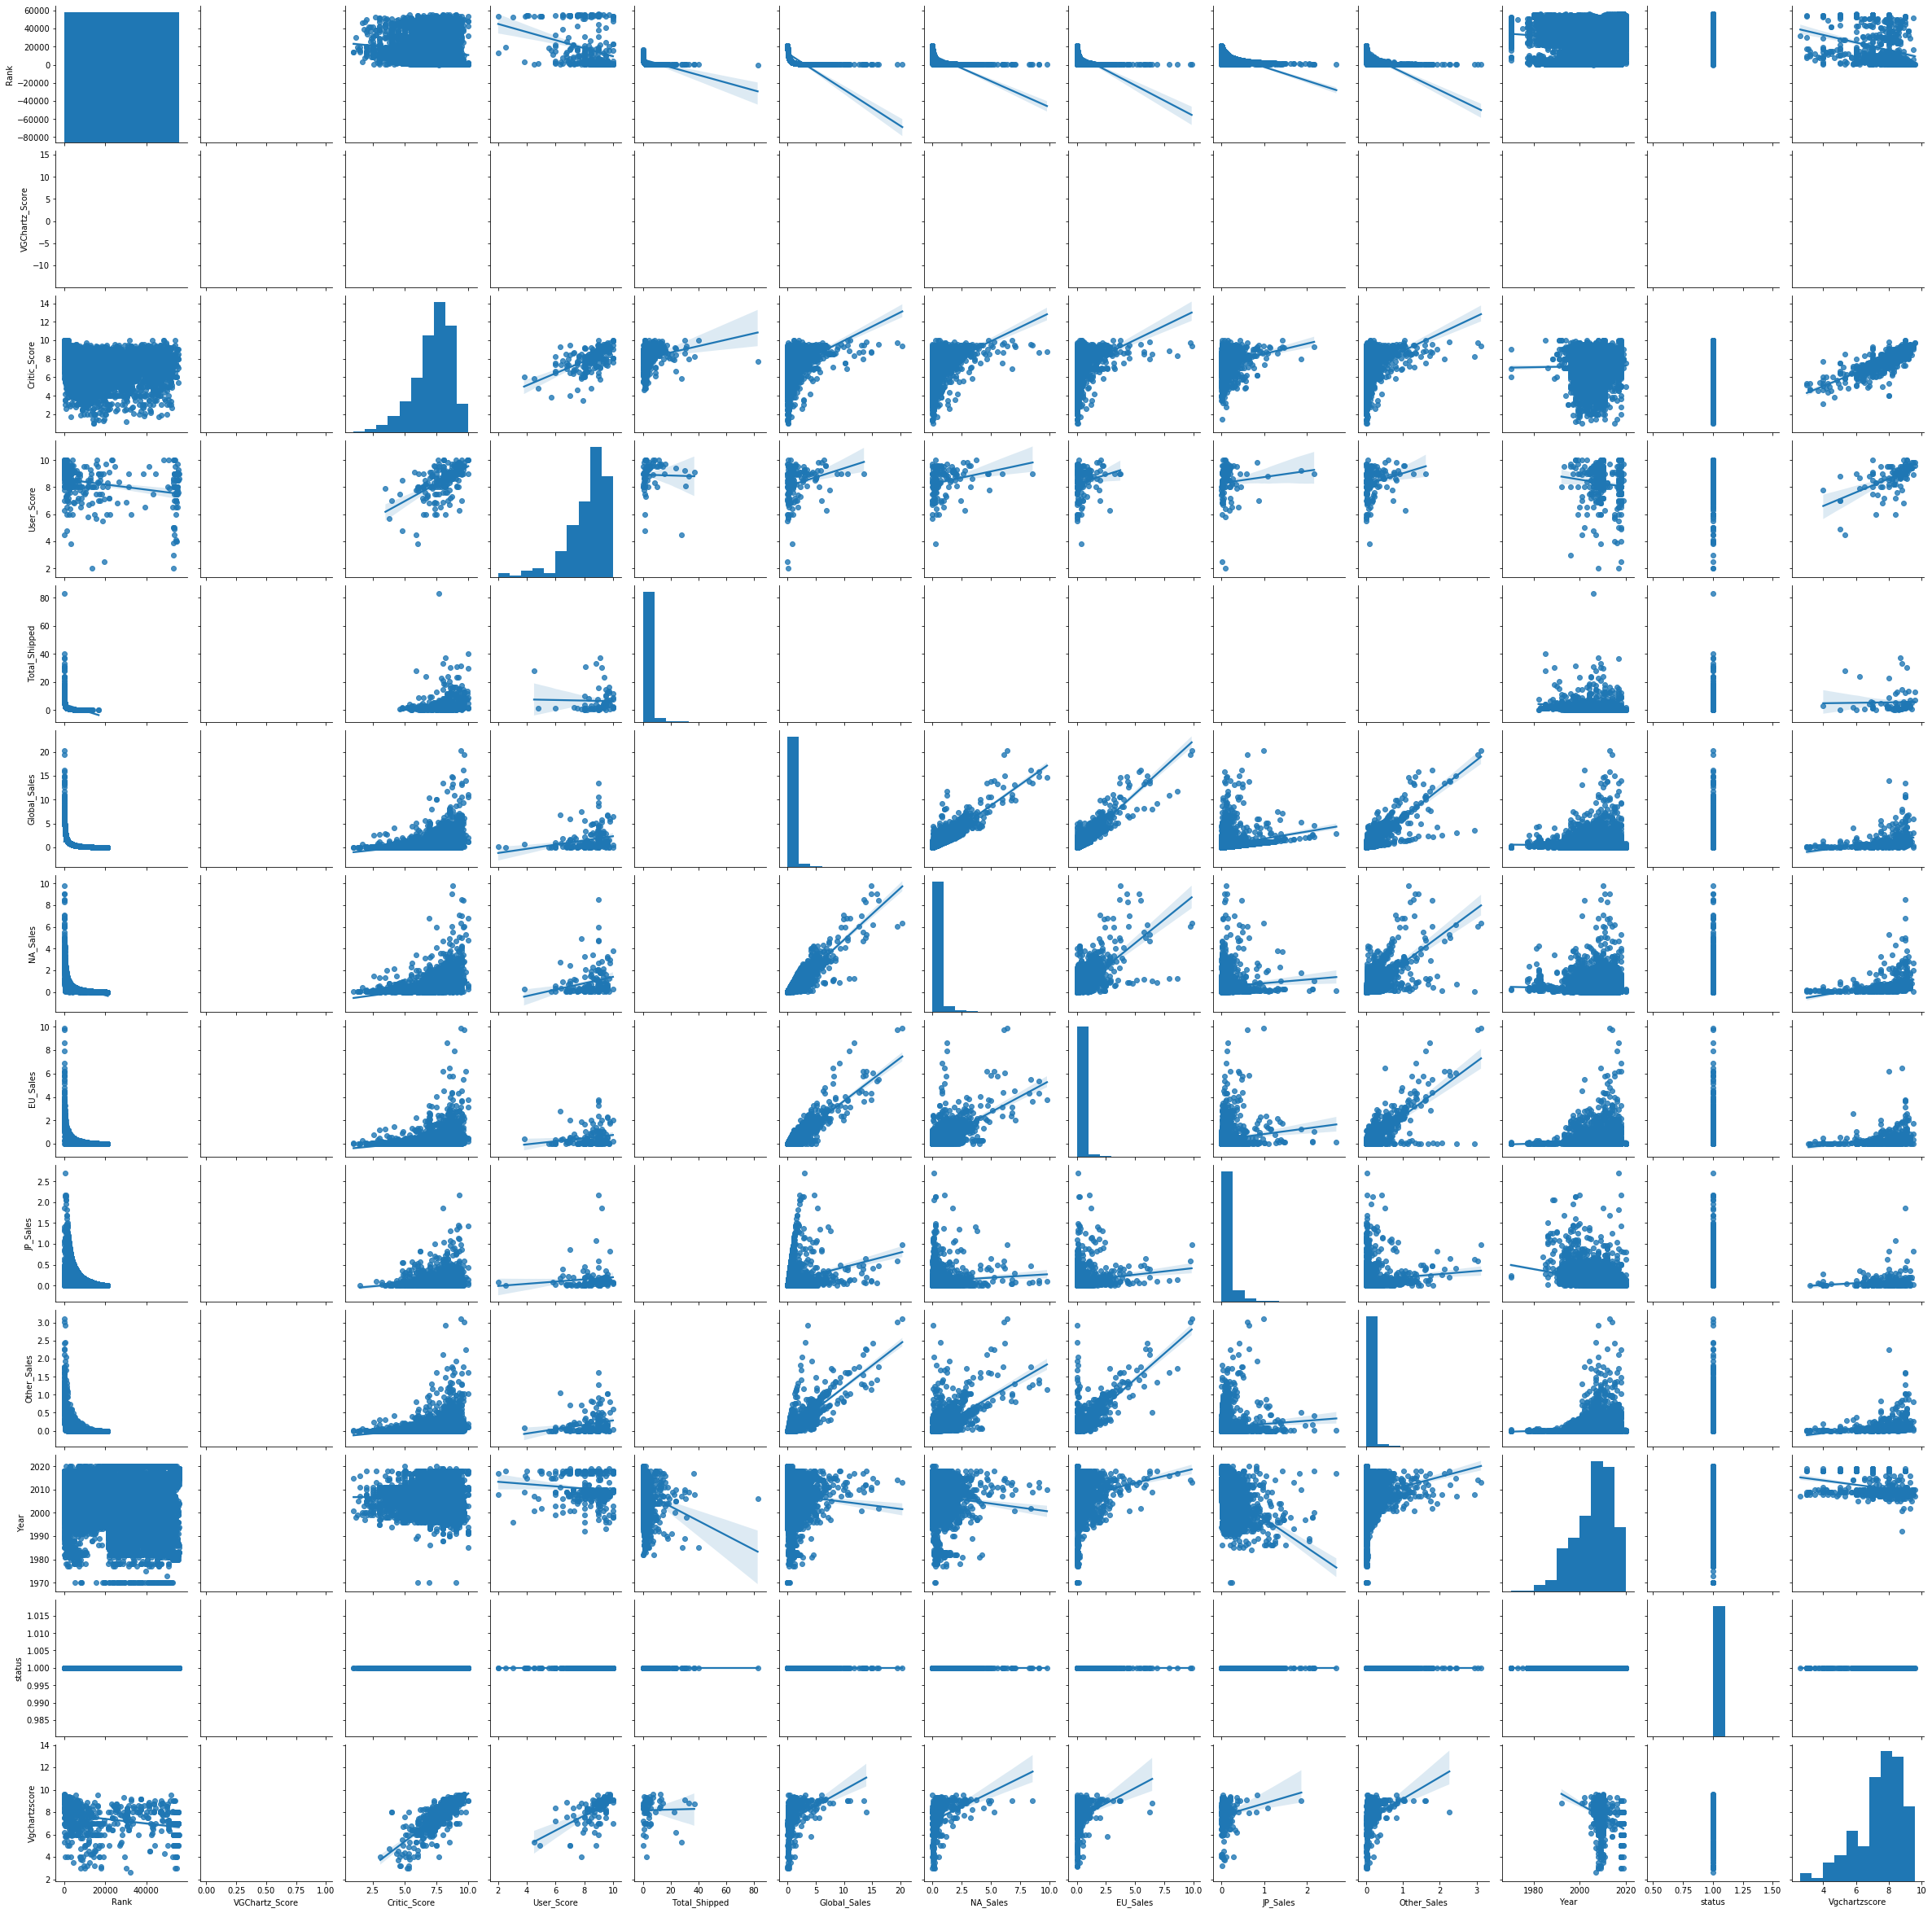

In [18]:
sns.pairplot(df, kind='reg')

## What is the trend of video games' global sales of all time?

In [19]:
# Split by region
df_sales_split_by_year = df.groupby(
     ['Year']
 ).agg(
     NorthAmerica = ('NA_Sales','sum'),
     Europe = ('EU_Sales','sum'),
     Japan = ('JP_Sales','sum'),
     Other = ('Other_Sales','sum')
 ).reset_index()

In [20]:
df_sales_split_by_year.tail(21)

,Year,NorthAmerica,Europe,Japan,Other
26,2000.0,86.28,53.47,30.46,10.32
27,2001.0,130.55,73.99,21.76,18.54
28,2002.0,185.12,94.09,25.90,24.20
29,2003.0,176.81,97.85,22.82,25.33
30,2004.0,171.70,84.02,21.62,24.83
31,2005.0,199.48,77.40,19.61,28.98
32,2006.0,154.39,56.68,33.23,28.61
33,2007.0,244.43,115.23,35.31,60.15
34,2008.0,306.64,155.13,37.48,75.31
35,2009.0,283.84,150.41,34.97,64.54


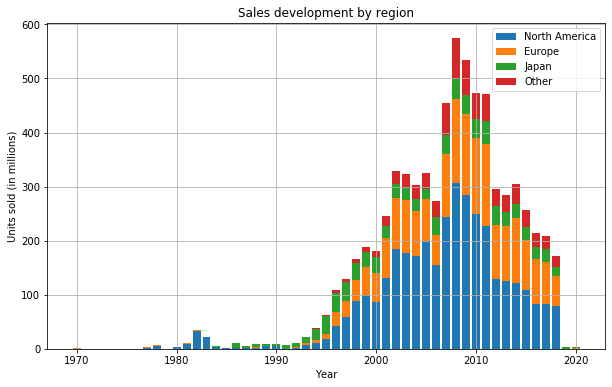

In [21]:
# Sales development bu region with stacked bars
plt.figure(figsize=(10,6))
p1=plt.bar(df_sales_split_by_year.Year, df_sales_split_by_year.NorthAmerica)
bot = df_sales_split_by_year.NorthAmerica
p2=plt.bar(df_sales_split_by_year.Year, df_sales_split_by_year.Europe, bottom=bot)
bot = bot+df_sales_split_by_year.Europe
p3=plt.bar(df_sales_split_by_year.Year, df_sales_split_by_year.Japan, bottom=bot)
bot = bot+df_sales_split_by_year.Japan
p4=plt.bar(df_sales_split_by_year.Year, df_sales_split_by_year.Other, bottom=bot)
plt.title('Sales development by region')
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('North America', 'Europe', 'Japan', 'Other'))
plt.ylabel('Units sold (in millions)')
plt.xlabel('Year')
plt.grid()
plt.show()

## Check what values has Global Sales missing

PS2     108
X360    107
PS3      97
PS4      80
XOne     37
Wii      31
DS       20
PSP      12
PS       12
PC        9
GBA       8
XB        7
NS        3
3DS       2
N64       1
GB        1
PSV       1
PSN       1
Name: Platform, dtype: int64


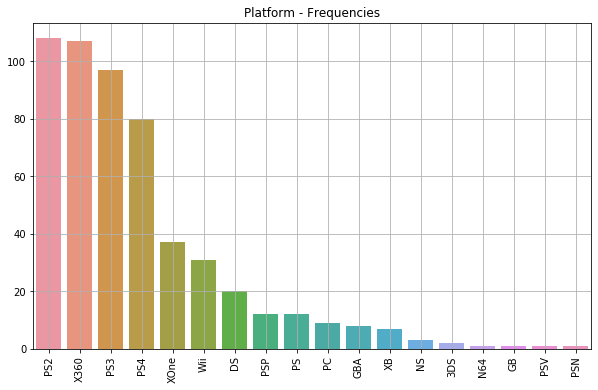

In [22]:
# Let's remove data before 2010, as it's too old and market tendencies may have changed a lot since then:
dfRecent = df[(df['Year'] >= 2000) & (df['Global_Sales'] >= 2)]
categorical_eval(dfRecent, 'Platform', ' - Frequencies')

In [23]:
df.loc[df['Platform'] == 'And'].sample(50)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
42123,42124,Quell Memento,quell-memento,Misc,NaN,And,Fallen Tree Games,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,http://www.vgchartz.com/game/72272/quell-memen...,1,NaN,/games/boxart/default.jpg
48817,48818,The Sims 3,the-sims-3,Simulation,T,And,Electronic Arts,Edge of Reality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,20th Jul 18,http://www.vgchartz.com/game/71426/the-sims-3/...,1,NaN,/games/boxart/full_6672448AmericaFrontccc.png
23661,23662,Back side of the Earth: Pilot Brothers 3,back-side-of-the-earth-pilot-brothers-3,Misc,NaN,And,G5 Entertainment,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,http://www.vgchartz.com/game/79292/back-side-o...,1,NaN,/games/boxart/default.jpg
47539,47540,Tap Sports Baseball,tap-sports-baseball,Sports,NaN,And,Glu Mobile Inc.,Glu Mobile Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,http://www.vgchartz.com/game/84513/tap-sports-...,1,NaN,/games/boxart/full_4021888AmericaFrontccc.jpg
48147,48148,The Enchanted Cave,the-enchanted-cave,Misc,NaN,And,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,http://www.vgchartz.com/game/79165/the-enchant...,1,NaN,/games/boxart/default.jpg
27429,27430,Crystareino,crystareino,Role-Playing,NaN,And,"Kotobuki Solution Co., Ltd.",Kemco-Seika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,http://www.vgchartz.com/game/83967/crystareino...,1,NaN,/games/boxart/full_4159245AmericaFrontccc.png
26818,26819,Colossatron: Massive World Threat,colossatron-massive-world-threat,Misc,NaN,And,Halfbrick Studios,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,http://www.vgchartz.com/game/78718/colossatron...,1,NaN,/games/boxart/default.jpg
27887,27888,Dawnkeeper: Last Survivors,dawnkeeper-last-survivors,Misc,NaN,And,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,http://www.vgchartz.com/game/82558/dawnkeeper-...,1,NaN,/games/boxart/default.jpg
32016,32017,Geometry Dash,geometry-dash,Misc,NaN,And,Robert Topala,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,http://www.vgchartz.com/game/82374/geometry-da...,1,NaN,/games/boxart/default.jpg
28088,28089,Deer Hunter 2014,deer-hunter-2014,Misc,NaN,And,Glu Mobile Inc.,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,http://www.vgchartz.com/game/77866/deer-hunter...,1,NaN,/games/boxart/default.jpg


In [24]:
a = df['Platform'].unique()
print(sorted(a))

['2600', '3DO', '3DS', '5200', '7800', 'ACPC', 'AJ', 'AST', 'Aco', 'Amig', 'And', 'ApII', 'Arc', 'BBCM', 'BRW', 'C128', 'C64', 'CD32', 'CDi', 'DC', 'DS', 'DSi', 'DSiW', 'FMT', 'GB', 'GBA', 'GBC', 'GC', 'GEN', 'GG', 'GIZ', 'Int', 'Linux', 'Lynx', 'MS', 'MSD', 'MSX', 'Mob', 'N64', 'NES', 'NG', 'NGage', 'NS', 'OSX', 'Ouya', 'PC', 'PCE', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSN', 'PSP', 'PSV', 'S32X', 'SAT', 'SCD', 'SNES', 'TG16', 'VB', 'VC', 'WS', 'WW', 'Wii', 'WiiU', 'WinP', 'X360', 'XB', 'XBL', 'XOne', 'ZXS', 'iOS', 'iQue']
